# Caravan Insurance Challenge
## Identify potential purchasers of caravan insurance policies

This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?

https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge/data

This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: <b>Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?</b>

Each observation corresponds to a postal code. Variables beginning with M refer to demographic statistics of the postal code, while variables beginning with P and A (as well as CARAVAN, the target variable) refer to product ownership and insurance statistics in the postal code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/caravan-insurance-challenge.csv')
data.shape  # (9822, 87)

(9822, 87)

In [3]:
data.head(3)

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# 'CARAVAN' is the target variable:
target = data.iloc[:, -1]

# up to 'MBERARBO':
#data = data.iloc[:, :25]

In [5]:
# balance of the target variable:
target.value_counts() / len(target)  # 0: 94.5%, 1: 5.5%

CARAVAN
0    0.940338
1    0.059662
Name: count, dtype: float64

The dataset seems un-balanced: 94.5% of the obervations have the variable target=0, 5.5% have the variable target=1.

In [6]:
data.isnull().sum()

ORIGIN      0
MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 87, dtype: int64

No variables (up to 'MBERARBO', my part) has null values in the dataset.

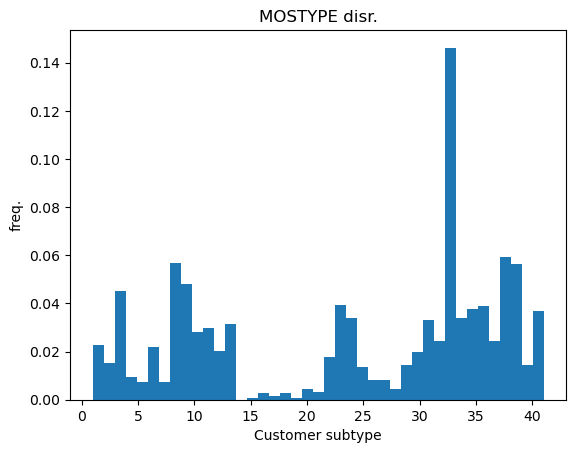

In [7]:
# 'MOSTYPE' is the customer subtype see L0
plt.hist(data['MOSTYPE'], bins=41, density=True)
plt.title('MOSTYPE disr.')
plt.xlabel('Customer subtype')
plt.ylabel('freq.')
plt.show()
# 'MOSTYPE' categorical variable

L0: Customer subtype:

|code|description|
|----|-----------|
|1| High Income, expensive child|
|2| Very Important Provincials|
|3| High status seniors|
|4| Affluent senior apartments|
|5| Mixed seniors|
|6| Career and childcare|
|7| Dinki's (double income no kids)|
|8| Middle class families|
|9| Modern, complete families|
|10| Stable family|
|11| Family starters|
|12| Affluent young families|
|13| Young all american family|
|14| Junior cosmopolitan|
|15| Senior cosmopolitans|
|16| Students in apartments|
|17| Fresh masters in the city|
|18| Single youth|
|19| Suburban youth|
|20| Etnically diverse|
|21| Young urban have-nots|
|22| Mixed apartment dwellers|
|23| Young and rising|
|24| Young, low educated|
|25| Young seniors in the city|
|26| Own home elderly|
|27| Seniors in apartments|
|28| Residential elderly|
|29| Porchless seniors: no front yard|
|30| Religious elderly singles|
|31| Low income catholics|
|32| Mixed seniors|
|33| Lower class large families|
|34| Large family, employed child|
|35| Village families|
|36| Couples with teens 'Married with children'|
|37| Mixed small town dwellers|
|38| Traditional families|
|39| Large religous families|
|40| Large family farms|
|41| Mixed rurals|

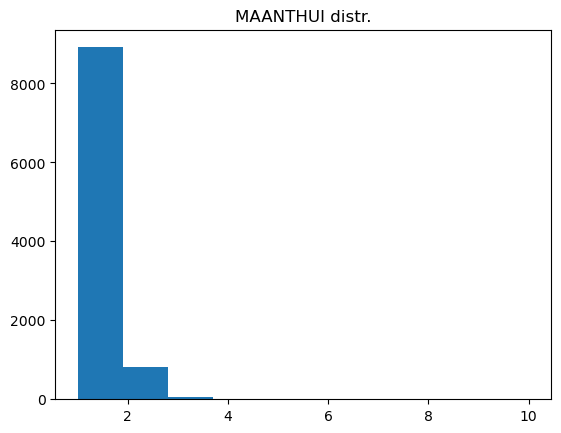

In [8]:
# Number of houses 1 - 10
plt.hist(data['MAANTHUI'], bins=10)
plt.title('MAANTHUI distr.')
plt.show()
# 'MAANTHUI': discrete numerical in [1,10]

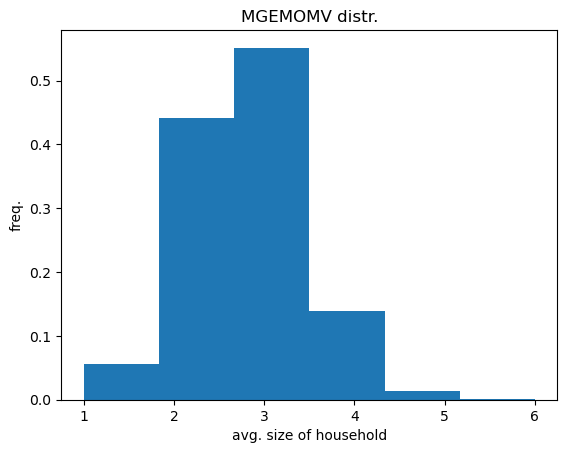

MGEMOMV
3    4513
2    3616
4    1132
1     452
5     106
6       3
Name: count, dtype: int64

In [9]:
# 'MGEMOMV' ???
plt.hist(data['MGEMOMV'], bins=6, density=True)
plt.title('MGEMOMV distr.')
plt.xlabel('avg. size of household')
plt.ylabel('freq.')
plt.show()
# 'MGEMOMV': numerical in [1,6]
data['MGEMOMV'].value_counts()

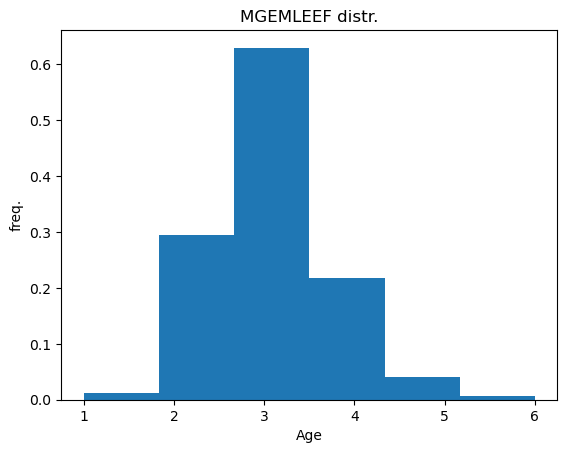

MGEMLEEF
3    5154
2    2409
4    1777
5     329
1     104
6      49
Name: count, dtype: int64

In [10]:
# 'MGEMLEEF' 
plt.hist(data['MGEMLEEF'], bins=6, density=True)
plt.title('MGEMLEEF distr.')
plt.xlabel('Age')
plt.ylabel('freq.')
plt.show()
# 'MGEMLEEF': numerical in [1,6]
data['MGEMLEEF'].value_counts()

L1: average age keys:

|code|description|
|----|-----------|
|1| 20-30 years|
|2| 30-40 years|
|3| 40-50 years|
|4| 50-60 years|
|5| 60-70 years|
|6| 70-80 years|

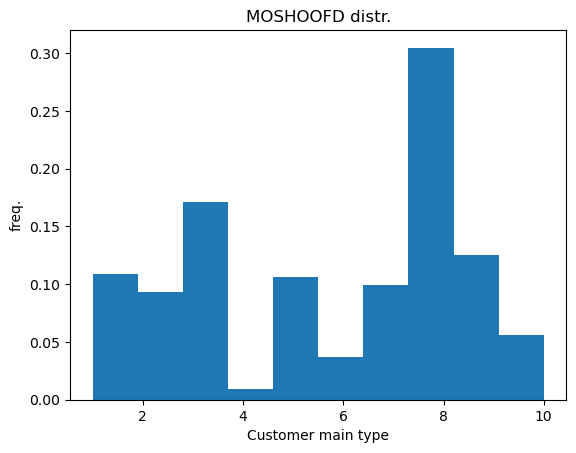

In [11]:
# 'MOSHOOFD' Customer main type; see L2
plt.hist(data['MOSHOOFD'], bins=10, density=True)
plt.title('MOSHOOFD distr.')
plt.xlabel('Customer main type')
plt.ylabel('freq.')
plt.show()
# 'MOSHOOFD': categorical

L2: customer main type keys:

|code|description|
|----|-----------|
|1| Successful hedonists|
|2| Driven Growers|
|3| Average Family|
|4| Career Loners|
|5| Living well|
|6| Cruising Seniors|
|7| Retired and Religeous|
|8| Family with grown ups|
|9| Conservative families|
|10| Farmers|


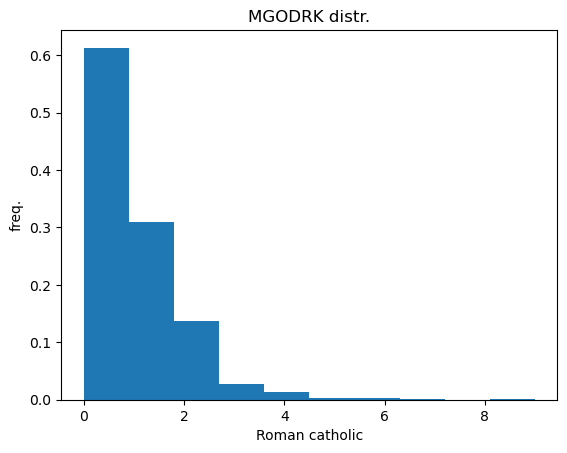

In [12]:
# 'MGODRK' Roman catholic see L3
plt.hist(data['MGODRK'], density=True)
plt.title('MGODRK distr.')
plt.xlabel('Roman catholic')
plt.ylabel('freq.')
plt.show()

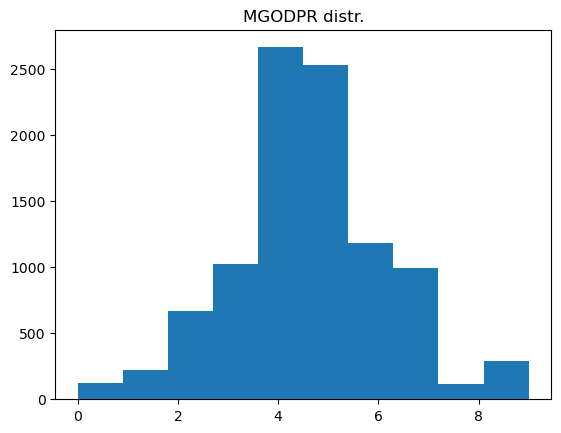

In [13]:
# 'MGODPR' Protestant ... see L3
plt.hist(data['MGODPR'])
plt.title('MGODPR distr.')
plt.show()

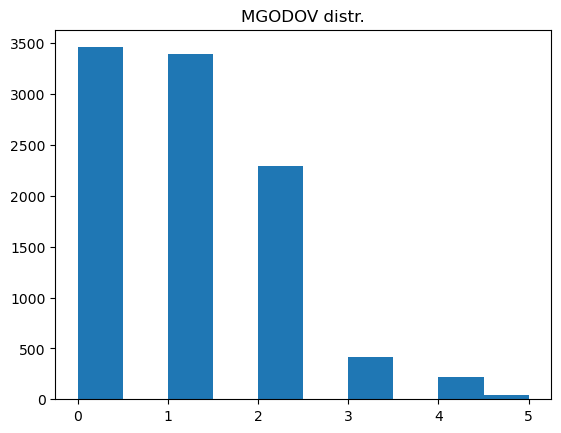

In [14]:
# 'MGODOV' Other religion ... see L3
plt.hist(data['MGODOV'])
plt.title('MGODOV distr.')
plt.show()

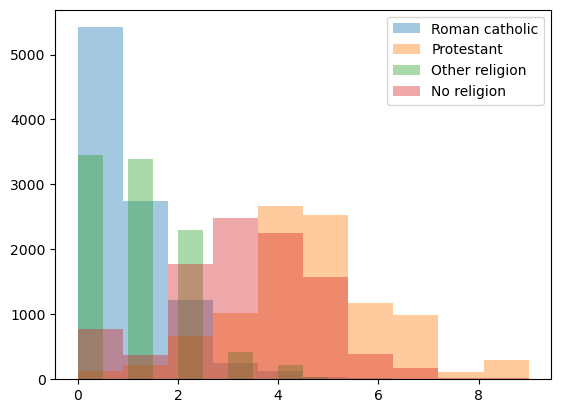

In [15]:
# distributions of MGODRK, MGODPR, MGODOV, MGODGE:
plt.hist(data['MGODRK'], alpha=0.4, label='Roman catholic')
plt.hist(data['MGODPR'], alpha=0.4, label='Protestant')
plt.hist(data['MGODOV'], alpha=0.4, label='Other religion')
plt.hist(data['MGODGE'], alpha=0.4, label='No religion')
plt.legend(loc='upper right')
plt.show()


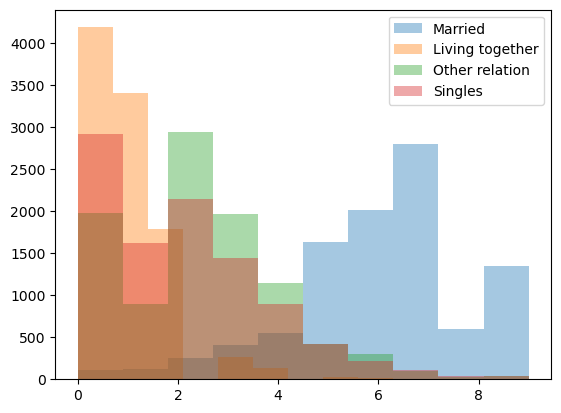

In [16]:
# distributions of 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN':
plt.hist(data['MRELGE'], alpha=0.4, label='Married')
plt.hist(data['MRELSA'], alpha=0.4, label='Living together')
plt.hist(data['MRELOV'], alpha=0.4, label='Other relation')
plt.hist(data['MFALLEEN'], alpha=0.4, label='Singles')
plt.legend(loc='upper right')
plt.show()

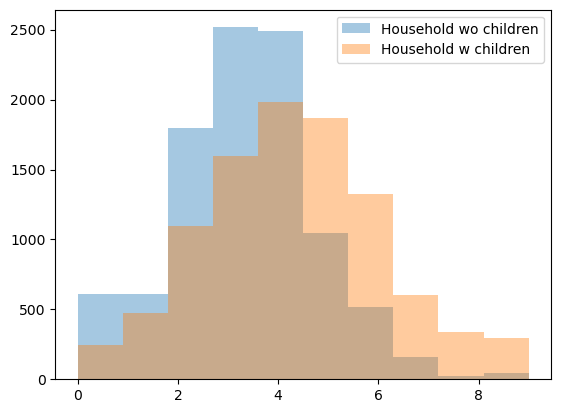

In [17]:
# distributions of 'MFGEKIND', 'MFWEKIND':

plt.hist(data['MFGEKIND'], alpha=0.4, label='Household wo children')
plt.hist(data['MFWEKIND'], alpha=0.4, label='Household w children')
plt.legend(loc='upper right')
plt.show()

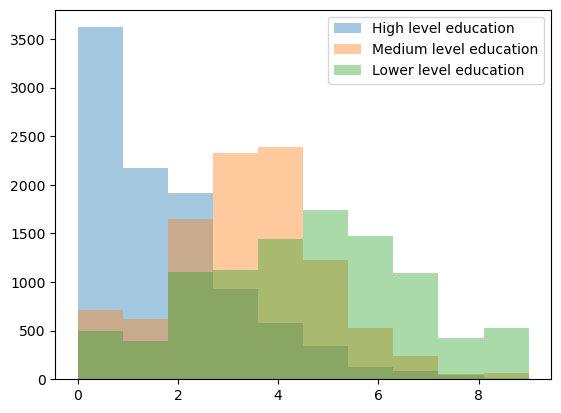

In [18]:
# distributions of 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG':

plt.hist(data['MOPLHOOG'], alpha=0.4, label='High level education')
plt.hist(data['MOPLMIDD'], alpha=0.4, label='Medium level education')
plt.hist(data['MOPLLAAG'], alpha=0.4, label='Lower level education')
plt.legend(loc='upper right')
plt.show()

(array([2871., 2626., 2056., 1168.,  452.,  228.,  152.,  147.,   16.,
         106.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

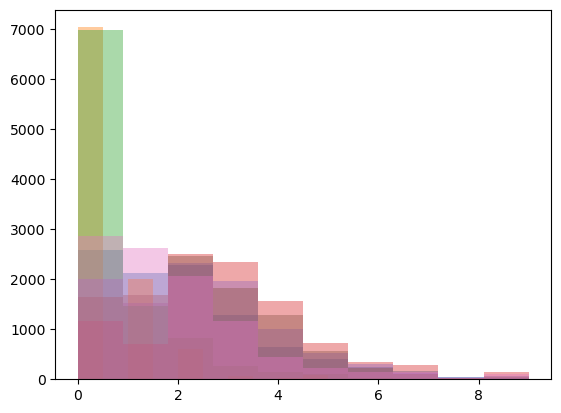

In [19]:
# distribution of 'MBERHOOG'

plt.hist(data['MBERHOOG'], alpha=0.4, label='High status')
plt.hist(data['MBERZELF'], alpha=0.4, label='Entrepreneur')
plt.hist(data['MBERBOER'], alpha=0.4, label='Farmer')
plt.hist(data['MBERMIDD'], alpha=0.4, label='Middle management')
plt.hist(data['MBERARBG'], alpha=0.4, label='Skilled labourers')
plt.hist(data['MBERARBO'], alpha=0.4, label='Unskilled labourers')
plt.hist(data['MSKA'], alpha=0.4, label='Social class A')

L3: percentage keys:

|code|description|
|----|-----------|
|0| 0%|
|1| 1 - 10%|
|2| 11 - 23%|
|3| 24 - 36%|
|4| 37 - 49%|
|5| 50 - 62%|
|6| 63 - 75%|
|7| 76 - 88%|
|8| 89 - 99%|
|9| 100%|

In [79]:
#remove the columns ORIGIN and MOSTYPE and MGEMLEEF
data_num_var = data.drop(['ORIGIN', 'MOSTYPE', 'MGEMLEEF', 'MOSHOOFD'], axis=1)
data_cat_var = data[['MOSTYPE', 'MGEMLEEF', 'MOSHOOFD', 'CARAVAN']]

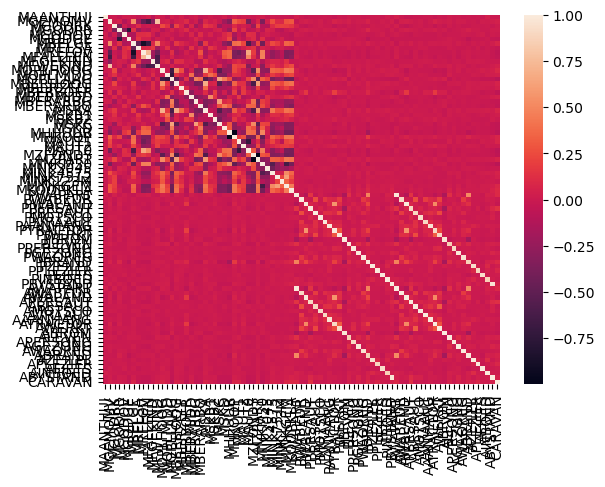

MRELGE MRELOV corr: -0.8832510022111436
MHHUUR MHKOOP corr: -0.9996249771214906
MZFONDS MZPART corr: -0.9993813153170856
PWAPART AWAPART corr: 0.9810968231832752
PWABEDR AWABEDR corr: 0.9066627173733852
PWALAND AWALAND corr: 0.9844844145855659
PPERSAUT APERSAUT corr: 0.9075061189702943
PBESAUT ABESAUT corr: 0.8943094325414931
PMOTSCO AMOTSCO corr: 0.9237277238722886
PVRAAUT AVRAAUT corr: 0.9011216745928782
PAANHANG AAANHANG corr: 0.9628673228723881
PTRACTOR ATRACTOR corr: 0.913831132089969
PWERKT AWERKT corr: 0.9088725791528574
PBROM ABROM corr: 0.9676618080236541
PLEVEN ALEVEN corr: 0.8529685876508554
PPERSONG APERSONG corr: 0.8987258602775463
PGEZONG AGEZONG corr: 0.9797883927331633
PWAOREG AWAOREG corr: 0.9598820849069667
PBRAND ABRAND corr: 0.8693543271626898
PZEILPL AZEILPL corr: 0.9427610064761041
PPLEZIER APLEZIER corr: 0.8939995715300649
PFIETS AFIETS corr: 0.9330676179345967
PINBOED AINBOED corr: 0.8658446247637941
PBYSTAND ABYSTAND corr: 0.9647738197287067
MAANTHUI CARAVAN co

In [38]:
#plot the correlation matrix of the numerical variables
import seaborn as sns
corr = data_num_var.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#print the couples of variables with a correlation higher than 0.5
for i in range(len(corr.columns)):
    for j in range(i,len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.8 and i != j:
            print(corr.columns[i], corr.columns[j], 'corr:', corr.iloc[i, j])

for i in range(len(corr.columns)):
    print(corr.columns[i], corr.columns[-1], 'corr:', corr.iloc[i, -1])




<Figure size 640x480 with 0 Axes>

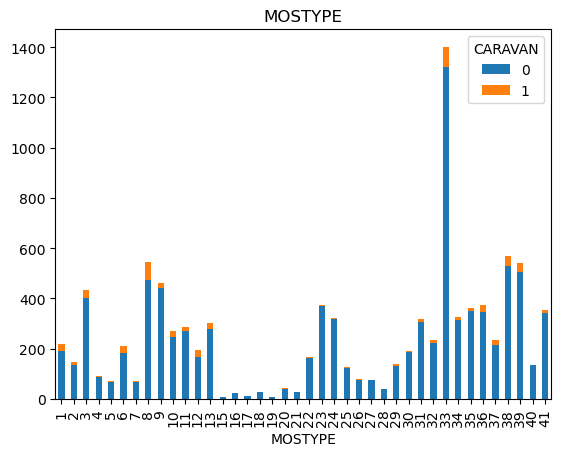

<Figure size 640x480 with 0 Axes>

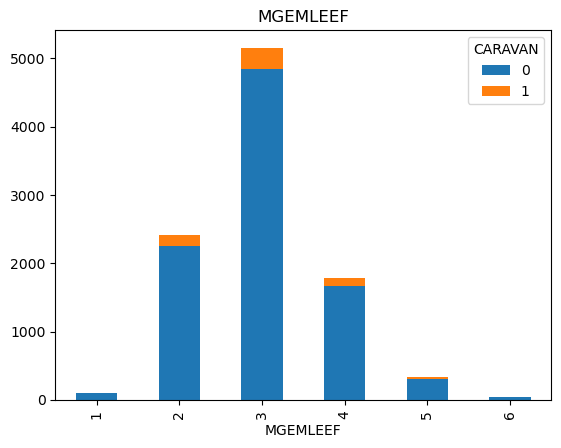

<Figure size 640x480 with 0 Axes>

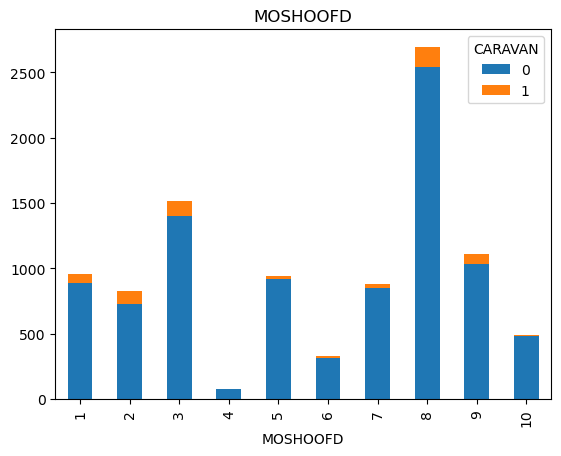

In [83]:
# plot the stacked barplot of the categorical variables
# where each stack is the number of 0 and 1 in the target variable
# for each category of the categorical variable

""" for i in range(len(data_cat_var.columns)):
    plt.figure()
    data_cat_var.groupby(target.name)[data_cat_var.columns[i]].value_counts().unstack(0).plot.bar(stacked=True)
    plt.show()
 """
# rewrite the loop in a more readable way
for i in range(len(data_cat_var.columns)-1):
    plt.figure()
    data_cat_var.groupby(target.name)[data_cat_var.columns[i]].value_counts().unstack(0).plot.bar(stacked=True)
    plt.title(data_cat_var.columns[i])
    plt.show()


In [85]:
#perform a t-test to see if the difference between the means of the categoriacal
#variables is statistically significant

from scipy.stats import ttest_ind
for i in range(len(data_cat_var.columns)-1):
    for j in range(len(data_cat_var[i].unique())): # for each category of the variable
        print(ttest_ind(target, data_cat_var[data_cat_var.columns[i]]==data_cat_var[i].unique()[j]))

KeyError: 0